In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# import data
# load data
data = pd.read_csv('hp_data.csv')
data.head()

,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk,price
0,BTM Layout,Super built-up Area,1450,Resale,5,1,4,1,6300000
1,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3,11500000
2,Whitefield,Super built-up Area,1019,Resale,1,2,5,2,3800000
3,Ambalipura,Super built-up Area,1857,Resale,15,4,5,4,10500000
4,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3,11500000


In [3]:
data.shape

(3500, 9)

In [4]:
data.size

31500

In [5]:
# data preprocessing
# checking value count and info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   place       3500 non-null   object
 1   built       3500 non-null   object
 2   sqft        3500 non-null   int64 
 3   sale        3500 non-null   object
 4   yearsOld    3500 non-null   int64 
 5   floor       3500 non-null   int64 
 6   totalFloor  3500 non-null   int64 
 7   bhk         3500 non-null   int64 
 8   price       3500 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 246.2+ KB


In [6]:
# checking null value in dataset
data.isnull().sum()

place         0
built         0
sqft          0
sale          0
yearsOld      0
floor         0
totalFloor    0
bhk           0
price         0
dtype: int64

In [7]:
data.describe()

,sqft,yearsOld,floor,totalFloor,bhk,price
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3.500000e+03
mean,1538.163143,7.602000,4.197714,6.371429,4.197714,8.067807e+06
std,416.264178,3.803196,4.782410,4.461808,4.782410,4.984973e+06
min,1019.000000,1.000000,1.000000,4.000000,1.000000,3.800000e+06
25%,1200.000000,5.000000,1.000000,4.000000,1.000000,4.800000e+06
50%,1543.000000,5.000000,3.000000,4.000000,3.000000,6.600000e+06
75%,1784.000000,10.000000,4.000000,5.000000,4.000000,1.050000e+07
max,4856.000000,15.000000,18.000000,29.000000,18.000000,4.750000e+07


In [8]:
# yearsOld value counts
data['yearsOld'].value_counts()

5     1430
10    1403
15     340
1      327
Name: yearsOld, dtype: int64

In [9]:
# sale value counts
data['sale'].value_counts()

Resale    3500
Name: sale, dtype: int64

In [10]:
# floor value counts
data['floor'].value_counts()

3     1057
1     1041
6      368
2      345
4      340
18     323
15      17
17       9
Name: floor, dtype: int64

In [11]:
# totalFloor value counts
data['totalFloor'].value_counts()

4     1761
5     1022
10     368
18     323
23      17
29       9
Name: totalFloor, dtype: int64

In [12]:
# bhk value counts
data['bhk'].value_counts()

3     1057
1     1041
6      368
2      345
4      340
18     323
15      17
17       9
Name: bhk, dtype: int64

In [13]:
# built value counts
data['built'].value_counts()

Super built-up  Area    3148
Built-up  Area           352
Name: built, dtype: int64

In [14]:
# place value counts
data['place'].value_counts()

Devarabeesana Halli         368
KR Puram                    358
BTM Layout                  356
Abbaiah Reddy Layout        352
Electronics City Phase 1    351
Ambalipura                  340
Yelahanka                   337
Whitefield                  327
Subramanyapura              323
Yelachenahalli              321
Sarakki Nagar                18
Malleshwaram                 17
Gunjur                       12
Frazer Town                  11
Rajaji Nagar                  9
Name: place, dtype: int64

In [15]:
# checking correlation of price data
corr = data.corr()
corr['price'].sort_values(ascending = False)

price         1.000000
sqft          0.778364
totalFloor    0.402256
bhk           0.263472
floor         0.263472
yearsOld      0.215712
Name: price, dtype: float64

# Visulization

array([[<AxesSubplot:title={'center':'sqft'}>,
        <AxesSubplot:title={'center':'yearsOld'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'totalFloor'}>],
       [<AxesSubplot:title={'center':'bhk'}>,
        <AxesSubplot:title={'center':'price'}>]], dtype=object)

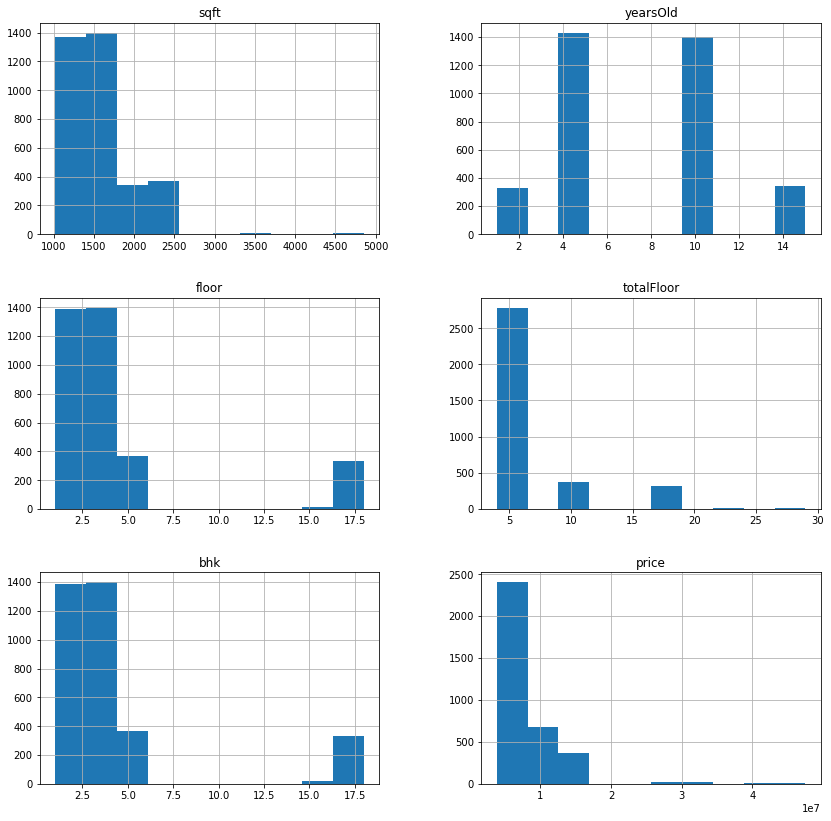

In [16]:
data.hist(figsize=(14,14))

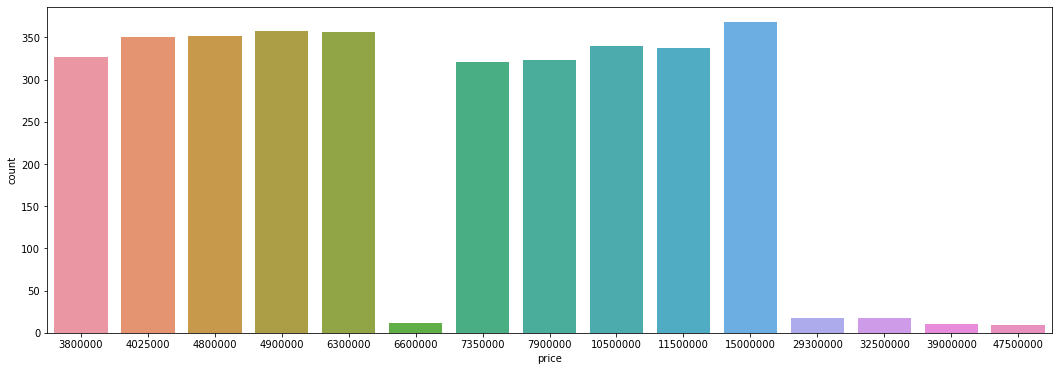

In [17]:
fig, ax = plt.subplots(figsize=(18,6))
sns.countplot(data['price'])
plt.show()

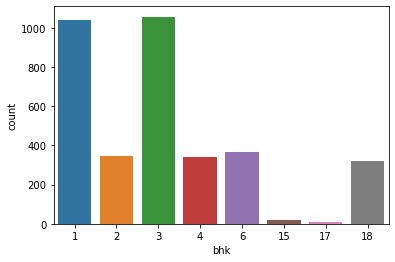

In [18]:
sns.countplot(data['bhk'])
plt.show()

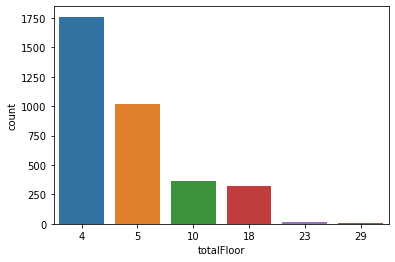

In [19]:
sns.countplot(data['totalFloor'])
plt.show()

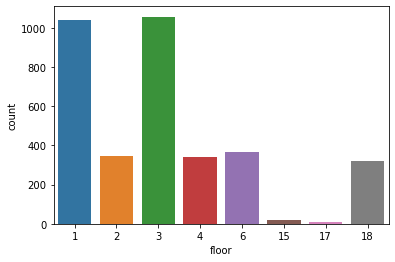

In [20]:
sns.countplot(data['floor'])
plt.show()

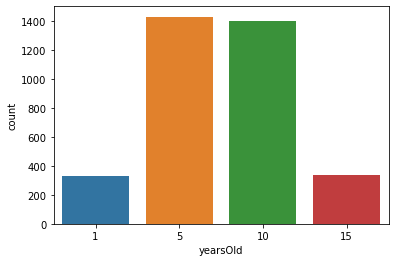

In [21]:
sns.countplot(data['yearsOld'])
plt.show()

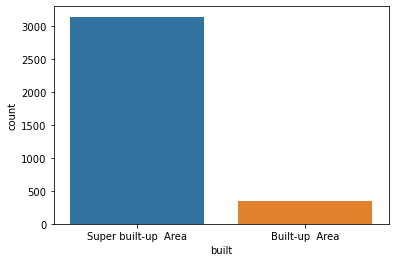

In [22]:
sns.countplot(data['built'])
plt.show()

<AxesSubplot:xlabel='floor', ylabel='price'>

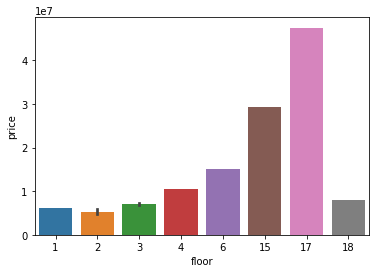

In [23]:

sns.barplot(data['floor'],data['price'])

<AxesSubplot:xlabel='built', ylabel='price'>

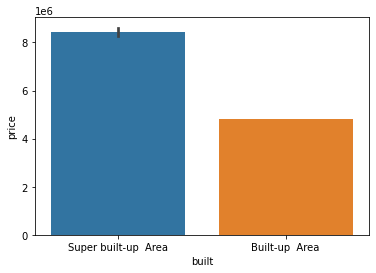

In [24]:
sns.barplot(data['built'],data['price'])

<AxesSubplot:xlabel='yearsOld', ylabel='place'>

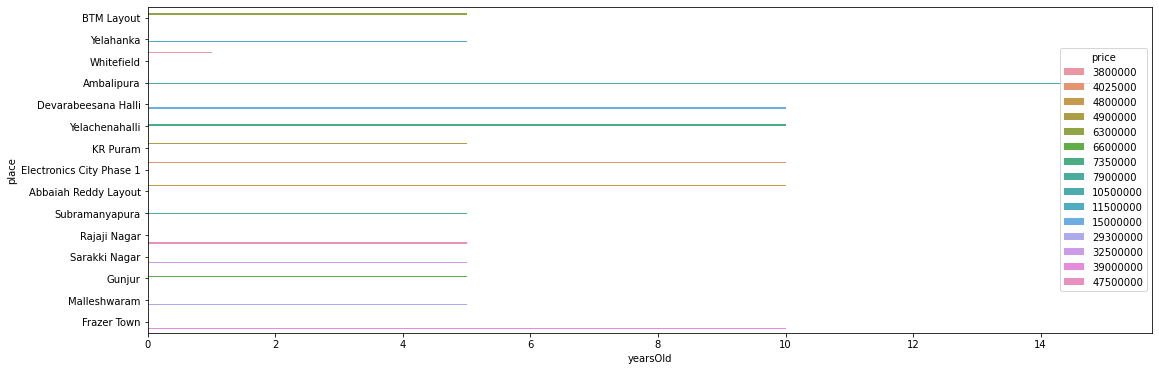

In [25]:
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data['yearsOld'],data['place'],hue=data['price'])

<AxesSubplot:xlabel='bhk', ylabel='place'>

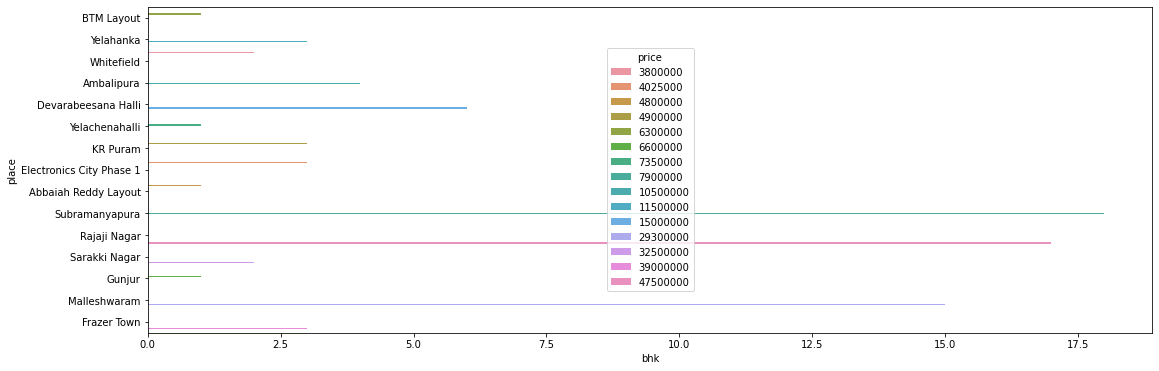

In [26]:
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data['bhk'],data['place'],hue=data['price'])

<AxesSubplot:xlabel='totalFloor', ylabel='place'>

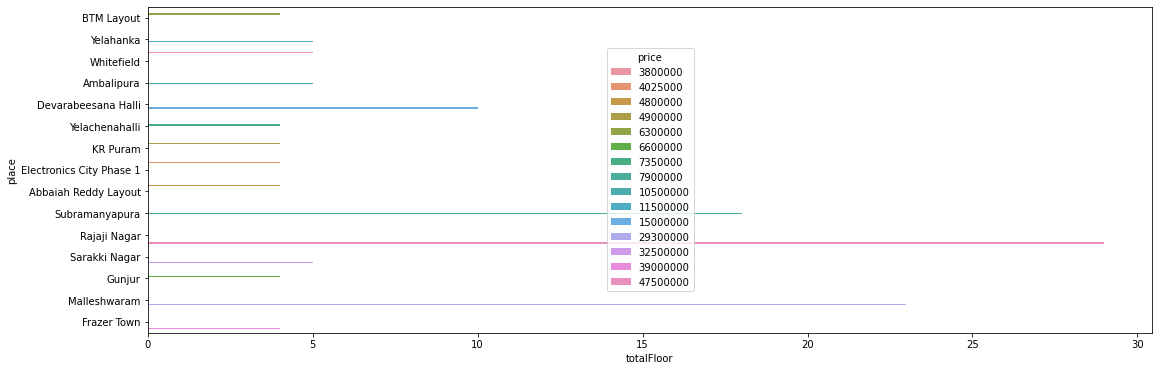

In [27]:
fig, ax = plt.subplots(figsize=(18,6))
sns.barplot(data['totalFloor'],data['place'],hue=data['price'])

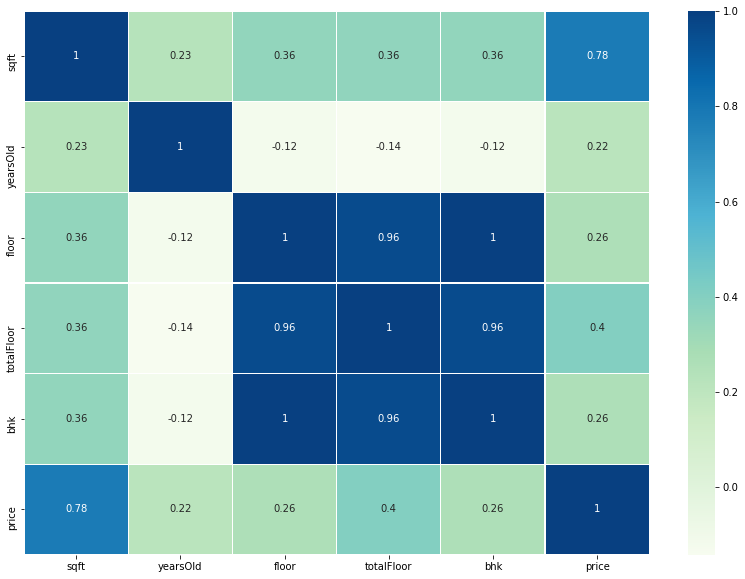

In [28]:
# heatmap
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), linewidths=.01, annot = True, cmap='GnBu')
plt.show()

# Data preprocessing

In [29]:
x = data.loc[:,['sqft','yearsOld','floor']]
y = data.price

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [31]:
x_train.shape

(2800, 3)

In [32]:
x_test.shape

(700, 3)

In [33]:
# Linear regression
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

0.6097240587682835

In [34]:
y_test

2509     4025000
3344    15000000
1361     6300000
188      6300000
1707    15000000
          ...   
2152     7350000
1036    11500000
2732    10500000
2475    11500000
1885    11500000
Name: price, Length: 700, dtype: int64

In [35]:
y_predict

array([ 8225994.03147548,  9376544.25436546,  7141036.14221367,
        7141036.14221367,  9376544.25436546,  3887241.1567504 ,
        6287755.9271669 ,  6287755.9271669 ,  8225994.03147548,
        2950589.37995695,  9999653.53319159,  5088885.05386256,
        7141036.14221367,  7141036.14221367,  3887241.1567504 ,
       11362065.26094584,  8225994.03147548, 11362065.26094584,
       11362065.26094584,  9376544.25436546,  5088885.05386256,
        2950589.37995695, 11362065.26094584,  3887241.1567504 ,
        9999653.53319159,  8225994.03147548,  8225994.03147548,
       11362065.26094584,  8225994.03147548,  9999653.53319159,
        9999653.53319159,  7141036.14221367,  7141036.14221367,
        9376544.25436546,  3887241.1567504 ,  7141036.14221367,
        2950589.37995695, 11362065.26094584,  9999653.53319159,
       11362065.26094584,  2950589.37995695,  5088885.05386256,
        6287755.9271669 , 11362065.26094584,  8225994.03147548,
        9999653.53319159,  8225994.03147

In [36]:
pd.crosstab(y_test,y_predict)

col_0,2.950589e+06,3.887241e+06,5.088885e+06,6.274160e+06,6.287756e+06,7.141036e+06,8.225994e+06,9.376544e+06,9.999654e+06,1.136207e+07,1.393931e+07,1.641121e+07,1.681119e+07,2.607756e+07,3.877876e+07
price,,,,,,,,,,,,,,,
3800000,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4025000,0,0,0,0,0,0,69,0,0,0,0,0,0,0,0
4800000,0,0,66,0,0,0,0,0,0,0,0,0,0,0,0
4900000,0,80,0,0,0,0,0,0,0,0,0,0,0,0,0
6300000,0,0,0,0,0,70,0,0,0,0,0,0,0,0,0
6600000,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0
7350000,0,0,0,0,69,0,0,0,0,0,0,0,0,0,0
7900000,0,0,0,0,0,0,0,0,64,0,0,0,0,0,0
10500000,0,0,0,0,0,0,0,0,0,61,0,0,0,0,0


In [37]:
# decision tree model
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

1.0

In [38]:
pd.crosstab(y_test,y_predict)

col_0,3800000,4025000,4800000,4900000,6300000,6600000,7350000,7900000,10500000,11500000,15000000,29300000,32500000,39000000,47500000
price,,,,,,,,,,,,,,,
3800000,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4025000,0,69,0,0,0,0,0,0,0,0,0,0,0,0,0
4800000,0,0,66,0,0,0,0,0,0,0,0,0,0,0,0
4900000,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0
6300000,0,0,0,0,70,0,0,0,0,0,0,0,0,0,0
6600000,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0
7350000,0,0,0,0,0,0,69,0,0,0,0,0,0,0,0
7900000,0,0,0,0,0,0,0,64,0,0,0,0,0,0,0
10500000,0,0,0,0,0,0,0,0,61,0,0,0,0,0,0


In [39]:
confusion_matrix(y_test,y_predict)

array([[70,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 69,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 66,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 80,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 70,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 69,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 64,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 61,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 74,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0

In [40]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

     3800000       1.00      1.00      1.00        70
     4025000       1.00      1.00      1.00        69
     4800000       1.00      1.00      1.00        66
     4900000       1.00      1.00      1.00        80
     6300000       1.00      1.00      1.00        70
     6600000       1.00      1.00      1.00         5
     7350000       1.00      1.00      1.00        69
     7900000       1.00      1.00      1.00        64
    10500000       1.00      1.00      1.00        61
    11500000       1.00      1.00      1.00        60
    15000000       1.00      1.00      1.00        74
    29300000       1.00      1.00      1.00         6
    32500000       1.00      1.00      1.00         2
    39000000       1.00      1.00      1.00         2
    47500000       1.00      1.00      1.00         2

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00   

In [41]:
# KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

1.0

In [42]:
pd.crosstab(y_test,y_predict)

col_0,3800000,4025000,4800000,4900000,6300000,6600000,7350000,7900000,10500000,11500000,15000000,29300000,32500000,39000000,47500000
price,,,,,,,,,,,,,,,
3800000,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4025000,0,69,0,0,0,0,0,0,0,0,0,0,0,0,0
4800000,0,0,66,0,0,0,0,0,0,0,0,0,0,0,0
4900000,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0
6300000,0,0,0,0,70,0,0,0,0,0,0,0,0,0,0
6600000,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0
7350000,0,0,0,0,0,0,69,0,0,0,0,0,0,0,0
7900000,0,0,0,0,0,0,0,64,0,0,0,0,0,0,0
10500000,0,0,0,0,0,0,0,0,61,0,0,0,0,0,0


In [43]:
y_predict = model.predict(x_test)

In [44]:
matrix=confusion_matrix(y_test,y_predict)
print(matrix)

[[70  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 69  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 66  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 80  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 70  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 69  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 64  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 61  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 74  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2]]


<AxesSubplot:>

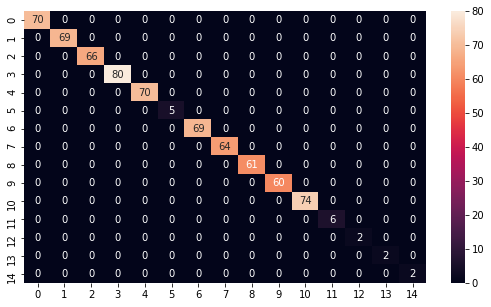

In [45]:
plt.figure(figsize = (9,5))
sns.heatmap(matrix,annot=True)

In [46]:
# Evaluation
print("accuracy:",accuracy_score(y_test,y_predict))

accuracy: 1.0


In [47]:
confusion_matrix(y_test,y_predict)

array([[70,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 69,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 66,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 80,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 70,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 69,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 64,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 61,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 74,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0

In [48]:
pd.crosstab(y_test,y_predict)

col_0,3800000,4025000,4800000,4900000,6300000,6600000,7350000,7900000,10500000,11500000,15000000,29300000,32500000,39000000,47500000
price,,,,,,,,,,,,,,,
3800000,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4025000,0,69,0,0,0,0,0,0,0,0,0,0,0,0,0
4800000,0,0,66,0,0,0,0,0,0,0,0,0,0,0,0
4900000,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0
6300000,0,0,0,0,70,0,0,0,0,0,0,0,0,0,0
6600000,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0
7350000,0,0,0,0,0,0,69,0,0,0,0,0,0,0,0
7900000,0,0,0,0,0,0,0,64,0,0,0,0,0,0,0
10500000,0,0,0,0,0,0,0,0,61,0,0,0,0,0,0


# Price prediction of Using KNN for Prediction

In [49]:
# import csv
data_1=pd.read_csv('hp_data.csv')
data_1.head()

,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk,price
0,BTM Layout,Super built-up Area,1450,Resale,5,1,4,1,6300000
1,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3,11500000
2,Whitefield,Super built-up Area,1019,Resale,1,2,5,2,3800000
3,Ambalipura,Super built-up Area,1857,Resale,15,4,5,4,10500000
4,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3,11500000


In [50]:
# Drop columns price ramge
data_1=data_1.drop(columns=['price'],axis=1)

In [51]:
data_1.head()

,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk
0,BTM Layout,Super built-up Area,1450,Resale,5,1,4,1
1,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3
2,Whitefield,Super built-up Area,1019,Resale,1,2,5,2
3,Ambalipura,Super built-up Area,1857,Resale,15,4,5,4
4,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3


In [52]:
# k-fold cross validation
kf = KFold(n_splits=4)
kf

KFold(n_splits=4, random_state=None, shuffle=False)

In [53]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 5 6 7 8] [3 4]
[0 1 2 3 4 7 8] [5 6]
[0 1 2 3 4 5 6] [7 8]


# Conclusion

In [54]:
#Dataframe for models
models = {"Linear Regression": LinearRegression(),
          "DecisionTree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier()}
          
          

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [55]:

model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Linear Regression': 0.6097240587682835, 'DecisionTree': 1.0, 'KNN': 1.0}

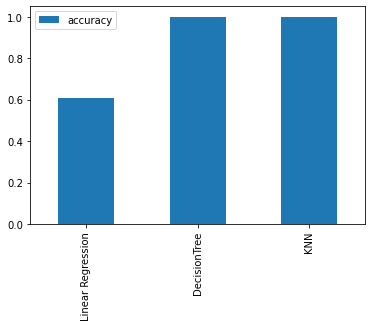

In [56]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();